# Анализ успешности рынка видеоигр

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель исследования

Выявить определяющие успешность игровой платформы закономерности. 

# Задачи исследования

1. Подготовить данные.
2. Провести исследовательский анализ данных.
3. Составить портрет пользователя каждого региона.
4. Проверить гипотезы о среднем пользовательском рейтинге.

# Исходные данные

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Данное исследование разделим на несколько частей

Часть 1. Изучение общей информации:

1. Изучение файлов с данными, получение общей информации, загрузка библиотек.
2. Нахождение и ликвидация пропусков.

Часть 2. Подготовка данных:

1. Приведение данных к нужным типам.
2. Нахождение и исправление аномалий и ошибок.

Часть 3. Исследовательский анализ данных:

1. Определение продаж по платформам на протяжении лет.
2. Формирование актуального периода и работа с ним.
3. Построение графика "ящика с усами".

Часть 4. Портрет пользователя каждого региона: 
1. Описание различий в долях продаж самых популярных платформ (топ-5). 
2. Определение разницы самых популярных жанров (топ-5). 
3. Влияние рейтинга ESRB на продажи в отдельном регионе.

Часть 5. Проверка гипотез: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Часть 6. Общий вывод.

## Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st



In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# проверим на явные дубликаты
games.duplicated().sum()

0

## Подготовка данных

In [7]:
# приводим столбцы к нижнему регистру 
games.columns= games.columns.str.lower()

In [8]:
# Проверим столбец user_score на уникальные значения
games['user_score'].value_counts(dropna = False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
9.6       2
2.3       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Чаще всего в столбце мы встречаем значение "tbd", которое означает "to be determined", что пользовательская оценка отсутствует. 

In [10]:
# Изменим tbd на Nan
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN

In [11]:
# Проверяем
games['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [12]:
# Ищем пропуски 
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64

In [13]:
# Ищем пропуски в процентах  
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Видим пропуски в столбцах year_of_release, critic_score, user_score, rating.

In [14]:
# Проверим пропуски в name
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пропуска в имени и жанре, удалим две данные строчки, так как игры старые и не имеют значения для анализа. 

In [15]:
# удаляем строчки
games.dropna(subset=['name'], inplace=True)

In [16]:
# проверим столбец year_of_release
games.loc[games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Сritic_score и user_score имеют пропуски, так как, скорее всего, игры не имеют соответствующих данных. 

In [17]:
# пропуски в rating заменим на "unknown"
games['rating'] = games['rating'].fillna('unknown')

In [18]:
# посчитаем все продажи игр и создадим новый столбец all_sales 
games['all_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

Вопросы: 
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Какие платформы лидируют по продажам, растут или падают? 
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?

Выделяются ли жанры с высокими и низкими продажами?

In [20]:
counted_games = games.groupby('year_of_release')['name'].count()
counted_games

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Можем наблюдать "взрыв" производства игр в конце нулевых, в 2008 году геймдев достиг своего апогея. В 2012 и последующих года выпуск игр сократился почти в два раза. Важными для анализа представляются игры, которые стали выходить с 2000 года, поскольку до данной даты игр выходило не много. 

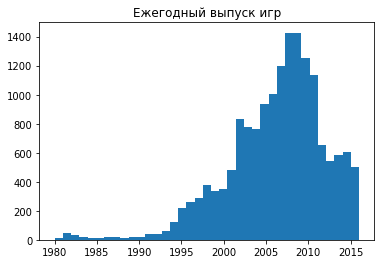

In [21]:
# Построим гистограмму выпуска игр
plt.hist(games['year_of_release'], bins=len(games['year_of_release'].unique())-1)
plt.title('Ежегодный выпуск игр')
plt.show()


Видим "бум" выпуска игр в конце нулевых. Однако с 2012 можем наблюдать спад выпуска игр, с 2012 начинается новая тенденция выпуска. 

In [22]:
# проверим лучшие показатели проданных копий игр
gaming = games.query('year_of_release >= 1990').groupby('platform')['all_sales'].sum().\
        sort_values(ascending=False).reset_index()
gaming.head(10)

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [23]:
# Посмотрим выпуск игр по консолям начиная с 2012
actual_games = games.query('year_of_release > 2011')
platform_all_sales = actual_games.query('year_of_release >= 2011').groupby('platform')['all_sales'].sum().\
            sort_values(ascending=False).reset_index()
platform_all_sales.head(10)

,platform,all_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Возьмем для анализа первую десятку

In [24]:
# топ платформы
top_platforms = platform_all_sales['platform'].to_list()
top_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

In [25]:
games.query('year_of_release > 2000'). \
    pivot_table(index='platform', columns='year_of_release',values='name', aggfunc='count', fill_value='-')

year_of_release,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,8.0,1.0,-,-,-,-,1.0,1.0,-,-,-,-,-,-,-,-
DS,-,-,-,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
GB,10.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,107.0,198.0,150.0,175.0,135.0,39.0,6.0,-,-,-,-,-,-,-,-,-
GC,22.0,152.0,144.0,83.0,97.0,40.0,4.0,-,-,-,-,-,-,-,-,-
N64,9.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15.0,19.0,33.0,30.0,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS,91.0,20.0,3.0,-,-,-,-,-,-,-,-,-,-,-,-,-


По таблице можно сделать вывод, что характерный срок работы платформы около 8 - 10 лет. Актуальный период 2012 - 2016 года, когда произведенных игр существенно сократилось. Самыми прибыльными платформами последних лет (2010-2016) являются PS4, PS3, X360, PC, PSV, 3DS, XOne.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [26]:
platforms = actual_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()
platforms.head(10)

,platform,all_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [27]:
platforms_top_sales = actual_games.pivot_table(index='year_of_release', columns='platform', \
                                        values='all_sales', aggfunc='sum')\
                                        .reset_index()
platforms_top_sales

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Продажи по всем платформам падают. Потенциально прибыльными платформами последних лет являются PS4, PS3, X360, PC. Однако надо заметить, что падение выпуска игр может быть связано с тем, что платформы ожидают нового поколения, поскольку они постепенно приближаются к своему характерному сроку работы.  

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


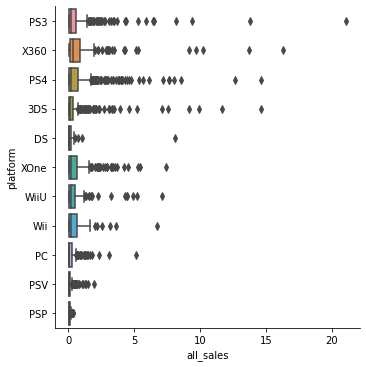

In [28]:
import seaborn as sns
sns.catplot(data=actual_games, kind='box', x='all_sales', y='platform', sharey=False)

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


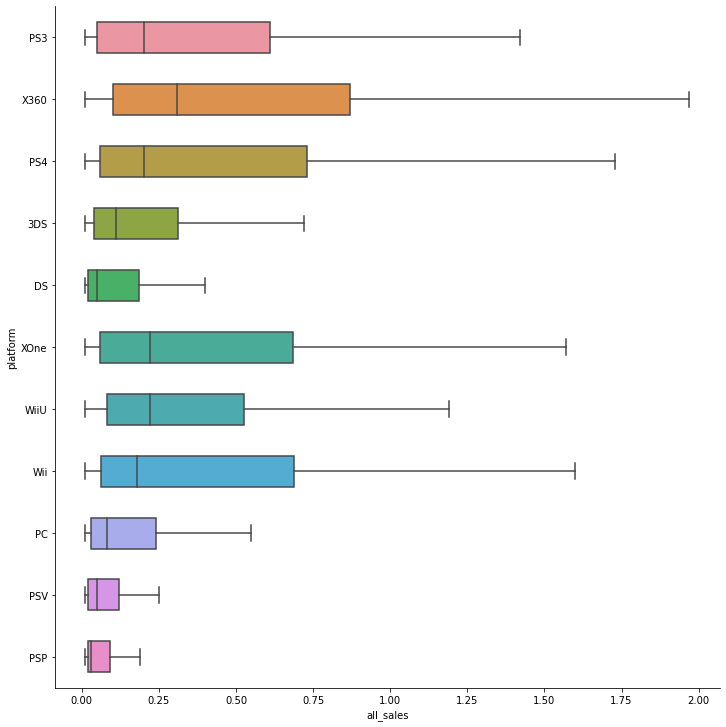

In [29]:
sns.catplot(data=actual_games, kind='box', x='all_sales', y='platform',sharey=False, showfliers=False, height=10,
            width = 0.5 
)


Построил два графика, первый демонстрирует всю статистику с выбросами, во втором исключены выбросы.

Согласно графику самыми успешными платформами являются Wii, WiiU PS3, PS4 XONE, X360

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?**


Согласно "Ящику с усами" самой популярной консолью является X360. 

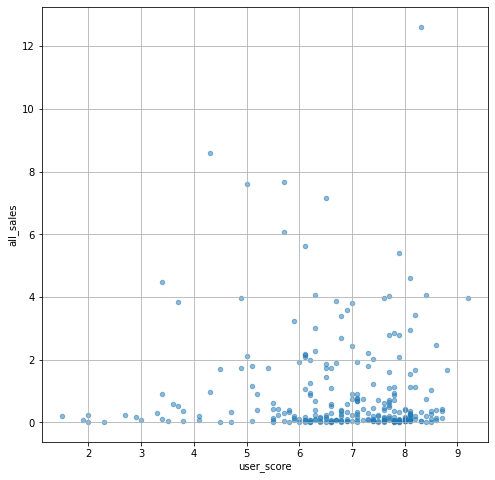

In [30]:
# выведем таблицу рассеивания по PS4, отобразив отзывы пользователей
actual_games[actual_games['platform']=='PS4'].plot(x='user_score', y='all_sales', 
                                                   kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()


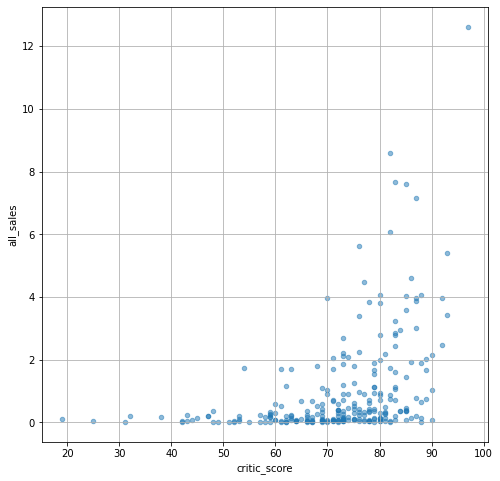

In [31]:
# выведем таблицу рассеивания по PS4, отобразив отзывы критиков
actual_games[actual_games['platform']=='PS4'].plot(x='critic_score', y='all_sales', 
                                                   kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

In [32]:
print("Корреляция отзывов критиков и продаж для платформы PS4:", \
      actual_games.query('platform == "PS4"')['all_sales'].\
                                        corr(actual_games.query('platform == "PS4"')['critic_score']))

Корреляция отзывов критиков и продаж для платформы PS4: 0.406567902061781


In [33]:
print("Корреляция отзывов пользователей и продаж для платформы PS4:", \
      actual_games.query('platform == "PS4"')['all_sales'].\
                                        corr(actual_games.query('platform == "PS4"')['user_score']))

Корреляция отзывов пользователей и продаж для платформы PS4: -0.031957110204556376


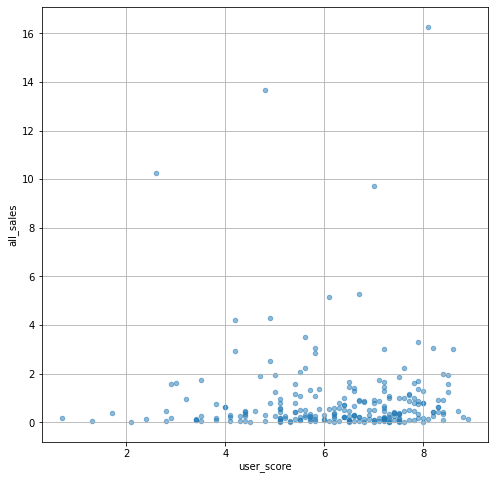

In [34]:
# выведем таблицу рассеивания по X360, отобразив отзывы пользователей
actual_games[actual_games['platform']=='X360'].plot(x='user_score', 
                                                    y='all_sales', kind='scatter', alpha=0.5,
                                                    figsize=(8,8), grid=True)
plt.show()

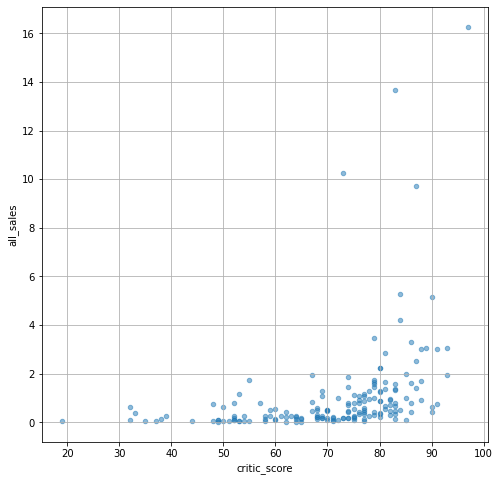

In [35]:
# выведем таблицу рассеивания по X360, отобразив отзывы критиков
actual_games[actual_games['platform']=='X360'].plot(x='critic_score', y='all_sales', 
                                                   kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

In [36]:
print("Корреляция отзывов пользователей и продаж для платформы X360:", actual_games.query('platform == "X360"')['all_sales'].\
                                        corr(actual_games.query('platform == "X360"')['user_score']))

Корреляция отзывов пользователей и продаж для платформы X360: 0.0061639786462133256


In [37]:
print("Корреляция отзывов критиков и продаж для платформы X360:", actual_games.query('platform == "X360"')['all_sales'].\
                                        corr(actual_games.query('platform == "X360"')['critic_score']))

Корреляция отзывов критиков и продаж для платформы X360: 0.36057348885073365


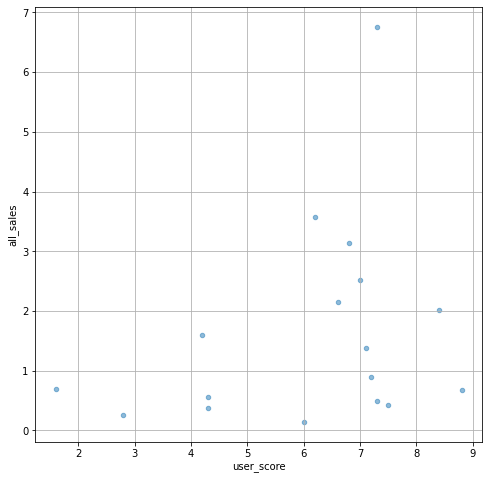

In [38]:
# выведем таблицу рассеивания по X360, отобразив отзывы пользователей
actual_games[actual_games['platform']=='Wii'].plot(x='user_score', 
                                                    y='all_sales', kind='scatter', alpha=0.5,
                                                    figsize=(8,8), grid=True)
plt.show()

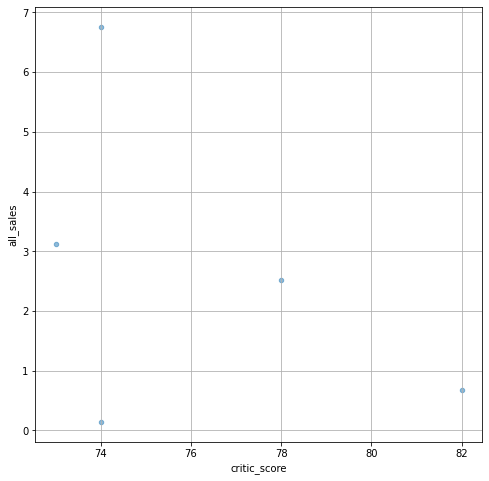

In [39]:
# выведем таблицу рассеивания по X360, отобразив отзывы критиков
actual_games[actual_games['platform']=='Wii'].plot(x='critic_score', 
                                                    y='all_sales', kind='scatter', alpha=0.5,
                                                    figsize=(8,8), grid=True)
plt.show()

In [40]:
print("Корреляция отзывов критиков и продаж для платформы Wii:", actual_games.query('platform == "Wii"')['all_sales'].\
                                        corr(actual_games.query('platform == "Wii"')['user_score']))

Корреляция отзывов критиков и продаж для платформы Wii: 0.2961968000747953


In [41]:
print("Корреляция отзывов пользователей и продаж для платформы Wii:", actual_games.query('platform == "Wii"')['all_sales'].\
                                        corr(actual_games.query('platform == "Wii"')['critic_score']))

Корреляция отзывов пользователей и продаж для платформы Wii: -0.4243413011077495


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>  Оценки критиков игр Wii, как было в ситуации с PS4 и X360, не демонстрируют прямую корреляцию с "цифрами" продаж.
    Ситуация складывается обратным образом,
    оценки критиков корреляции с продажами не имеют, в то время как оценка пользователей показывает среднюю корреляцию с продажами.
  </b></u></font>
    <br />
</div>

In [42]:
actual_games.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median').\
sort_values(by = 'all_sales', ascending = False)

,all_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>  По статистике медианных продаж самым высокодоходным жанром является Шутер, далее Спорт, замыкает третью строчку жанр Платформеров. На последних трех местах находятся Стратегия, Приключения, Пазл
  </b></u></font>
    <br />
</div>

## Портрет пользователя каждого региона

Рассмотрим самые популярные платформы и жанры по регионам

In [43]:
# NA platforms
actual_games.groupby('platform')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,platform,sum
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98
9,DS,4.59


In [44]:
# NA genres
actual_games.groupby('genre')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,genre,sum
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


In [45]:
# NA rating ESRB
actual_games.groupby('rating')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,M,231.57
1,E,114.37
2,unknown,103.31
3,E10+,75.70
4,T,66.02


In [46]:
# EU platforms
actual_games.groupby('platform')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,platform,sum
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36
9,DS,3.53


In [47]:
# EU genre
actual_games.groupby('genre')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,genre,sum
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [48]:
# EU rating ESRB
actual_games.groupby('rating')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,M,193.96
1,E,113.03
2,unknown,91.50
3,E10+,55.37
4,T,52.96


In [49]:
# jp platform
actual_games.groupby('platform')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,platform,sum
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.47
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


In [50]:
# jp genre
actual_games.groupby('genre')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(10)

,genre,sum
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


In [51]:
#jp rating ESRB
actual_games.groupby('rating')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,unknown,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


Популярность платформ:

В регионе NA самая популярная платформа - X360, самый популярный жанр - Action. В рейтинге ESRB на первом месте категория Е, с большим отставанием рейтинг М и Т.  
В регионе EU самая популярная платформа - PS4, самый популярный жанр - Action, на втором и третьем - sports и shooter.  В рейтинге ESRB на первом месте категория Е. На третьем месте неизвестный. 
В регионе JP самая популярная платформа - 3DS. X360 и XOne вообще не входит в топ-5 платформ в отличие от двух других регионов. Самый популярный жанр - Role-Playing. В рейтинге ESRB на первом месте категория неизвестно.


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>  На мой взгляд рейтинг ESRB рассчитан больше на западную аудиторию
        Японская культура очень не похожа на западную, вероятно, национальные особенности японцев таковы, что ESRB
        не может категоризовать игры, в которые они играют 
  </b></u></font>
    <br />
</div>



## Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. 
Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [52]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
actual_games[actual_games['platform'] == 'PC']['user_score'].notnull(), 
    actual_games[actual_games['platform'] == 'XOne']['user_score'].notnull()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.018849513526187356
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H₀ - средние пользовательские рейтинги жанров Action и Sports равны
H₁ - средние пользовательские рейтинги жанров Action и Sports не равны


In [53]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    actual_games[actual_games['genre'] == 'Action']['user_score'].notnull(), 
    actual_games[actual_games['genre'] == 'Sports']['user_score'].notnull())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.530595412367685e-11
Отвергаем нулевую гипотезу


Вывод: Стат анализ показал, что оценки пользователей для игр на платформах Xbox One и PC не равны, а также при анализе пользовательских оценок по жанрам Action и Sports нулевая гипотеза была отвергнута.

**Общий вывод:** 

В ходе работы пришли к следующим выводам: 

1) Компания "Стримчик" в 2017 должна сделать упор на платформах нового поколения - PS4, Xone, поскольку данные консоли являются последними моделями в своей категории, а значит, на них будут выходить игры в 2017 году.

2) Игры на портативные компьютеры всегда актуальны, поскольку данная платформа не подвержена устареванию (не имеет срок жизни) и, следовательно, игры на данную платформу будут актуальными и в 2017 году.

3) Существует категория устаревающих платформ - PS3, X360, им на замену пришли более новые модели, поэтому игры (согласно статистике) на эти платформы, продают/покупают реже. Компании стоит меньше сосредотачивать свои ресурсы на данных платформах. 

4) Согласно статистике самая популярная платформа в Северной Америке - это Xbox 360, однако последний тренд на сокращение купли/продажи игр этой платформы говорит о том, что Xbox 360 уступит свое место более новым консолям.

5) Необходимо ожидать появления платформ нового поколения, поскольку нынешнее новое поколение PS4, Xone существует уже несколько лет, обычно, новое поколение появляется раз в пятилетие. 

6) Корреляция между отзывами (пользователи и критики) и количеством продаж, исходя из изученных данных, слабо выражена, следовательно, плохие отзывы не конверсируются в плохие продажи.

7) В Северной Америке и Европе любимыми жанрами игр являются экшн и шутер, то есть компании "Стримчик" на этих рынках советуем продавать игры данных жанров. При входе на рынок Японии необходимо понимать уникальную культуру японцев, чтобы достичь успеха. Стандартные жанры и платформы не подходят для этого рынка, если компания предвидит инвестиции в этот рынок, то надо инвестрировать в жанры ролевых игр и миск, хотя любовь к играм жанра экшн в Японии тоже наличествует.

8) Рейтинг ESRB в Японии не находит поддержки, поэтому необходимо сосредоточить свои усилия на обнаружение новых нестандартных ниш в этой стране.

Итак: устроить рекламную компанию в Японии не представляется возможным, поскольку это страна довольно необычна для западного мышления, поэтому риск провалить рекламную компанию в этой стране высок. Поэтому необходимо сосредоточить свои усилия на Европе и Северной Америке. 

В Европе сильны позиции у компании Sony, значит, платформа рекламы должна быть PS4, жанр экшн либо шутер, категория M

Учитывая тот факт, что Microsoft американская компания - то поддержка консоли-детища Microsoft - Xbox, будет высокой, об этом свидетельствует статистика, рекламировать Xone (консоль нового поколения) необходимо в Северной Америке,жанр экшн либо шутер, категория M.
